In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import FormatStrFormatter
plt.style.use('default')
from itertools import groupby

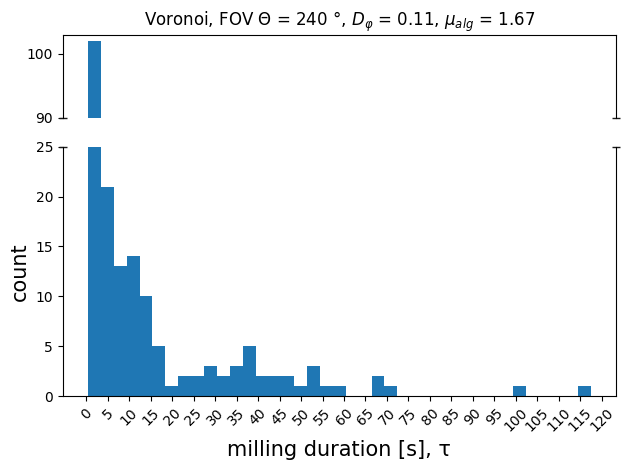

In [112]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 5
dphi = 1


w = 3
w2 = 5
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(90, 103)  # outliers only
ax2.set_ylim(0, 25)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Voronoi, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_240_middle_vor.pdf",bbox_inches="tight")

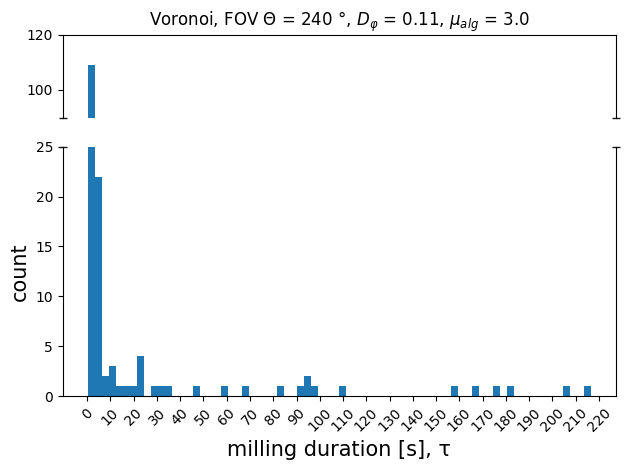

In [121]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 9
dphi = 1


w = 3
w2 = 10
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(90, 120)  # outliers only
ax2.set_ylim(0, 25)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)

ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Voronoi, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_240_top_vor.pdf",bbox_inches="tight")

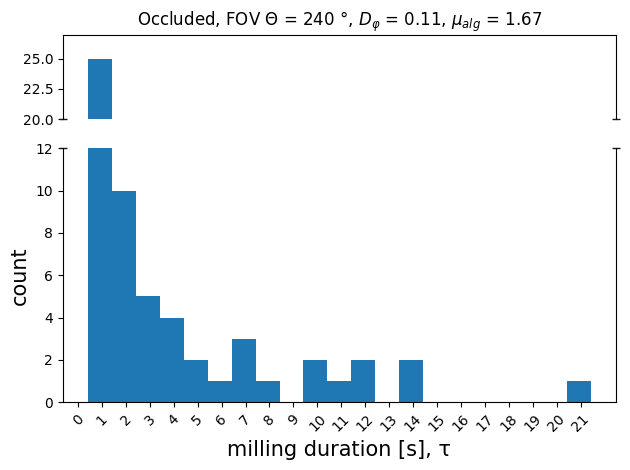

In [114]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_Col_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 5
dphi = 1


w = 1
w2 = 1
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(20, 27)  # outliers only
ax2.set_ylim(0, 12)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)


plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Occluded, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_240_middle_occ.pdf",bbox_inches="tight")

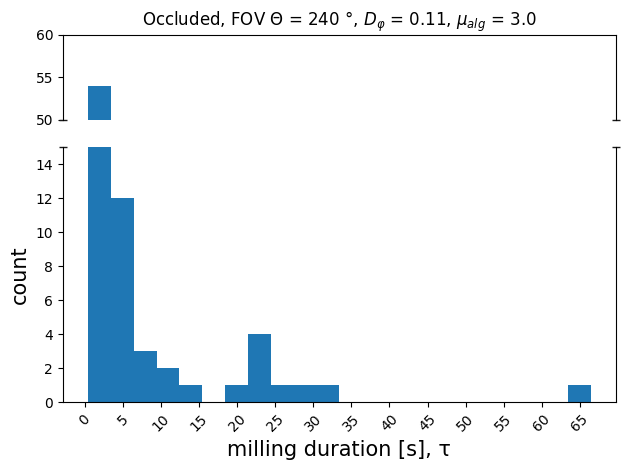

In [115]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_Col_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 9
dphi = 1


w = 3
w2 = 5
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(50, 60)  # outliers only
ax2.set_ylim(0, 15)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)


plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Occluded, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_240_top_occ.pdf",bbox_inches="tight")

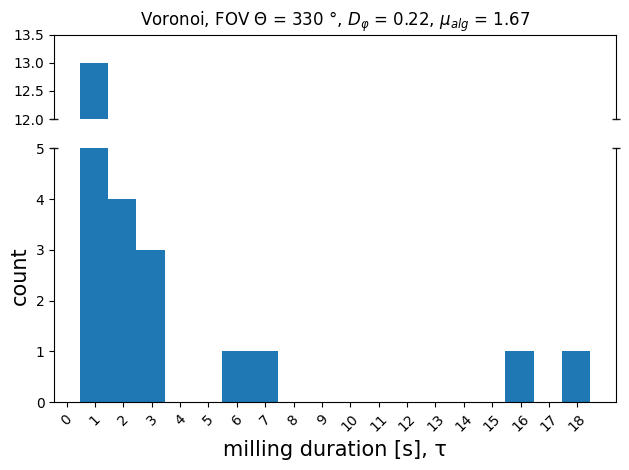

In [116]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 5
dphi = 2


w = 1
w2 = 1
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(12, 13.5)  # outliers only
ax2.set_ylim(0, 5)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Voronoi, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_330_middle_vor.pdf",bbox_inches="tight")

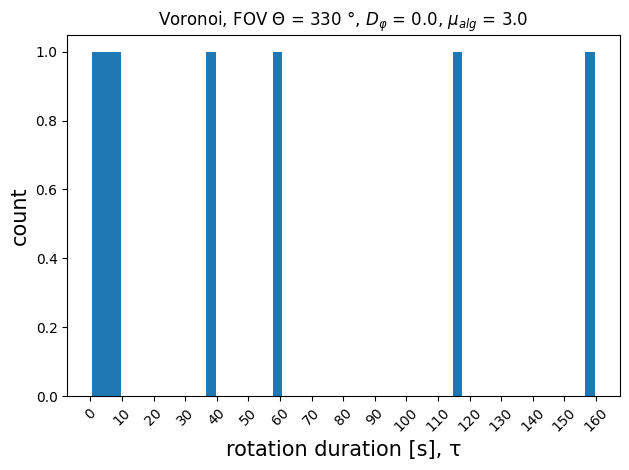

In [117]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 9
dphi = 0


w = 3
w2 = 10
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))
plt.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)


plt.xlabel("rotation duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_330_top_vor.pdf",bbox_inches="tight")

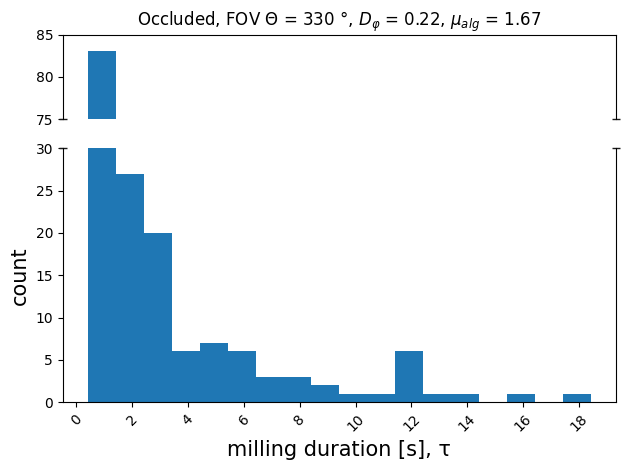

In [118]:
mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 5
dphi = 2


w = 1
w2 = 2
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(75, 85)  # outliers only
ax2.set_ylim(0, 30)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

plt.xlabel("milling duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Occluded, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_330_middle_occ.pdf",bbox_inches="tight")

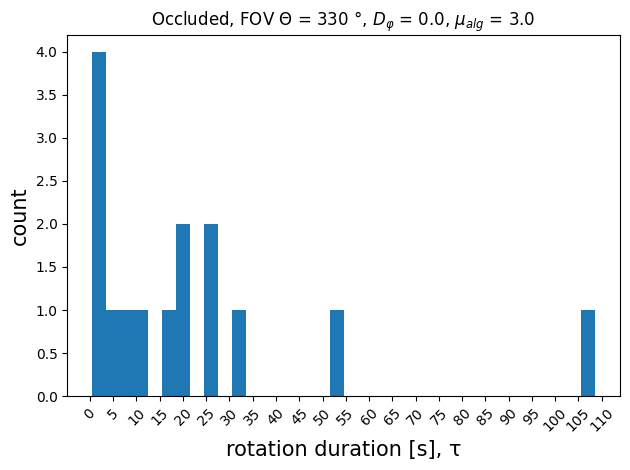

In [119]:
mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1


millevents_1 = []
astr = 9
dphi = 0


w = 3
w2 = 5
for i in range(20):
    lst = mill_abs[astr,dphi,i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 20:
            millevents_1.append(0.02*len(g))
plt.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
plt.xlabel("rotation duration [s], τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
plt.savefig("hist_alongCrit_330_top_occ.pdf",bbox_inches="tight")